In [1]:
import subprocess

transformers_cmd = "python -m pip install datasets==2.0.0".split()
process_scatter = subprocess.run(
            transformers_cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )

In [2]:
# #hide
# from utils import *
# setup_chapter()

# # setup_chapter() : notebooks/utils.

In [3]:
#Either 3rd or 4th Cell

# Base requirements
!pip install transformers[tf,torch,sentencepiece,vision,optuna,sklearn,onnxruntime]==4.11.3
!pip install datasets[audio]==1.16.1
!pip install matplotlib
!pip install ipywidgets
# Summarization
!pip install nltk==3.6.6
!pip install sacrebleu==1.5.1
!pip install rouge-score==0.0.4

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached datasets-1.16.1-py3-none-any.whl (298 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 2.0.0
    Uninstalling datasets-2.0.0:
      Successfully uninstalled datasets-2.0.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/

In [4]:
# hide
from transformers import pipeline, set_seed

# Summarization

In [5]:
import json
import pandas as pd
import boto3

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript1.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])


#with open('./chat_transcript1.json') as data_file:    
#    json_data = json.load(data_file)
    
#df = pd.json_normalize(json_data['Transcript'])
#df
text = df[['ContentType','DisplayName','Content','ParticipantRole','Type']]#.to_string(index=False)
text

,ContentType,DisplayName,Content,ParticipantRole,Type
0,application/vnd.amazonaws.connect.event.participant.joined,TP Training,NaN,CUSTOMER,EVENT
1,text/plain,TP Training,[customer connecting with agent - disregard],CUSTOMER,MESSAGE
2,text/plain,TP Training,agent,CUSTOMER,MESSAGE
3,text/plain,BOT,"Hi, I'm the Adobe Virtual Assistant. How can I help you?",SYSTEM,MESSAGE
4,text/plain,BOT,"{""genericAttachments"":[{""title"":""I want to make sure I understand clearly. How would you like to connect with an agent?"",""buttons"":[{""text"":""On the phone"",""value"":""On the phone"",""click"":{""actions"":[{""text"":""On the phone"",""type"":""publishText""}]}},{""text"":""Continue in chat"",""value"":""Continue in chat"",""click"":{""actions"":[{""text"":""Continue in chat"",""type"":""publishText""}]}}]}]}",SYSTEM,MESSAGE
5,text/plain,TP Training,Continue in chat,CUSTOMER,MESSAGE
6,text/plain,BOT,"{""genericAttachments"":[{""title"":""Ok. Let me connect you to the right agent. Which of these categories most closely describes your issue?"",""buttons"":[{""text"":""Try or buy an app"",""value"":""Try or buy an app"",""click"":{""actions"":[{""text"":""Try or buy an app"",""type"":""publishText""}]}},{""text"":""Solve a billing or payment issue"",""value"":""Solve a billing or payment issue"",""click"":{""actions"":[{""text"":""Solve a billing or payment issue"",""type"":""publishText""}]}},{""text"":""Cancel a plan"",""value"":""Cancel a plan"",""click"":{""actions"":[{""text"":""Cancel a plan"",""type"":""publishText""}]}},{""text"":""Manage my account"",""value"":""Manage my account"",""click"":{""actions"":[{""text"":""Manage my account"",""type"":""publishText""}]}},{""text"":""Troubleshoot a product issue"",""value"":""Troubleshoot a product issue"",""click"":{""actions"":[{""text"":""Troubleshoot a product issue"",""type"":""publishText""}]}}]}]}",SYSTEM,MESSAGE
7,text/plain,TP Training,Manage my account,CUSTOMER,MESSAGE
8,text/plain,BOT,Ok. Connecting you to an agent who can help.,SYSTEM,MESSAGE
9,text/plain,SYSTEM_MESSAGE,Connecting you with a senior specialist as soon as possible.,SYSTEM,MESSAGE


In [6]:
!pip install py7zr
#hide_output
from datasets import load_dataset

#dataset = load_dataset("cnn_dailymail", version="3.0.0") #https://huggingface.co/datasets/ccdv/cnn_dailymail
dataset = load_dataset("samsum")
print(f"Features: {dataset['train'].column_names}")

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


Reusing dataset samsum (/home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6)


  0%|          | 0/3 [00:00<?, ?it/s]

Features: ['id', 'dialogue', 'summary']


In [7]:
dataset['train']

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 14732
})

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [9]:
# %pwd
# %ls /root/.cache/

In [10]:
# %rm -rf /root/.cache/huggingface/

In [11]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["dialogue"])}):
""")
print(sample["dialogue"][:500])
print(f'\nSummary (length: {len(sample["summary"])}):')
print(sample["summary"])


Article (excerpt of 500 characters, total length: 111):

Olivia: Who are you voting for in this election? 
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great

Summary (length: 61):
Olivia and Olivier are voting for liberals in this election. 


In [12]:
sample = dataset["validation"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["dialogue"])}):
""")
print(sample["dialogue"][:500])
print(f'\nSummary (length: {len(sample["summary"])}):')
print(sample["summary"])


Article (excerpt of 500 characters, total length: 1018):

Emma: I’ve just fallen in love with this advent calendar! Awesome! I wanna one for my kids!
Rob: I used to get one every year as a child! Loved them! 
Emma: Yeah, i remember! they were filled with chocolates!
Lauren: they are different these days! much more sophisticated! Haha!
Rob: yeah, they can be fabric/ wooden, shop bought/ homemade, filled with various stuff
Emma: what do you fit inside?
Lauren: small toys, Christmas decorations, creative stuff, hair bands & clips, stickers, pencils 

Summary (length: 190):
Emma and Rob love the advent calendar. Lauren fits inside calendar various items, for instance, small toys and Christmas decorations. Her children are excited whenever they get the calendar.


## Text Summarization Pipelines

In [13]:
#sample_text = dataset["train"][1]["dialogue"][:2000]
sample_text = dataset["train"][1]["dialogue"]
# We'll collect the generated summaries of each model in a dictionary
summaries = {}

In [14]:
#hide_output
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

### Summarization Baseline


In [16]:
def three_sentence_summary(text):
    #return "\n".join(sent_tokenize(text)[:3])
    return "\n".join(sent_tokenize(text))

In [17]:
summaries["baseline"] = three_sentence_summary(sample_text)

### GPT-2

In [18]:
# #hide_output
# from transformers import pipeline, set_seed

# set_seed(42)
# pipe = pipeline("text-generation", model="gpt2-xl")
# gpt2_query = sample_text + "\nTL;DR:\n"
# pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
# summaries["gpt2"] = "\n".join(
#     sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

### T5

In [19]:
## hide_output
# pipe = pipeline("summarization", model="t5-large")
# pipe_out = pipe(sample_text)
# summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

### BART

In [20]:
#hide_output
#pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe = pipeline("summarization", model="linydub/bart-large-samsum")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

Your max_length is set to 62, but you input_length is only 38. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


### PEGASUS

In [21]:
#hide_output
#pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe = pipeline("summarization", model="RobertoFont/pegasus-large-samsum")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

Your max_length is set to 256, but you input_length is only 26. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


## Comparing Different Summaries

In [22]:
print("GROUND TRUTH")
print(dataset["train"][1]["summary"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Olivia and Olivier are voting for liberals in this election. 

BASELINE
Olivia: Who are you voting for in this election?
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great

BART
Olivia and Oliver are voting for the Liberals in this election.

PEGASUS
Olivia and Oliver are voting for Liberals in this election.



## Measuring the Quality of Generated Text

### BLEU

In [23]:
# hide_output
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

In [24]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


In [25]:
bleu_metric.add(
    prediction="As I can see, you need assistance with password reset.", reference=["need assistance with password reset"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,31.702331
counts,"[5, 4, 3, 2]"
totals,"[12, 11, 10, 9]"
precisions,"[41.67, 36.36, 30.0, 22.22]"
bp,1.0
sys_len,12
ref_len,5


### ROUGE

In [26]:
# hide_output
rouge_metric = load_metric("rouge")

In [27]:
reference = dataset["train"][1]["summary"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.571429,0.230769,0.500000,0.571429
bart,0.857143,0.631579,0.857143,0.857143
pegasus,0.900000,0.777778,0.900000,0.900000


## Evaluating PEGASUS on the CNN/DailyMail Dataset

In [28]:
# hide
# ignore this cell it is only to be able to start running the notebook here
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

#dataset = load_dataset("cnn_dailymail", version="3.0.0")
dataset = load_dataset("samsum")
rouge_metric = load_metric("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

Reusing dataset samsum (/home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6)


  0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
def evaluate_summaries_baseline(dataset, metric,
                                column_text="dialogue", 
                                column_summary="summary"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])    
    score = metric.compute()
    return score

In [30]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(818))

score = evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

Loading cached shuffled indices for dataset at /home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6/cache-2c0fe17dd4828305.arrow


,rouge1,rouge2,rougeL,rougeLsum
baseline,0.270756,0.091615,0.20659,0.247528


In [31]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
    """Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer, 
                               batch_size=16, device=device, 
                               column_text="dialogue", 
                               column_summary="summary"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):
        
        inputs = tokenizer(article_batch, max_length=512,  truncation=True, 
                        padding="max_length", return_tensors="pt")
        
        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device), 
                         length_penalty=0.8, num_beams=8, max_length=128)
        
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, 
                                clean_up_tokenization_spaces=True) 
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)
        
    score = metric.compute()
    return score

In [32]:
# # #Run to clear CUDA mermory
# import torch
# torch.cuda.empty_cache()
# # torch.cuda.memory_summary(device=None, abbreviated=False)

In [33]:
# !pip install GPUtil
# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache() 

In [34]:
# hide_output
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

#model_ckpt = "google/pegasus-cnn_dailymail"
model_ckpt = "RobertoFont/pegasus-large-samsum"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric, 
                                   model, tokenizer, batch_size=1)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 818/818 [06:58<00:00,  1.96it/s]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.456026,0.230114,0.387483,0.388325


In [35]:
# hide_input 
pd.DataFrame(rouge_dict, index=["pegasus"])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.456026,0.230114,0.387483,0.388325


## Training a Summarization Model

In [36]:
# hide_output
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Reusing dataset samsum (/home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6)


  0%|          | 0/3 [00:00<?, ?it/s]

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


In [37]:
# hide_input
print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][1]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][1]["summary"])

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Eric: MACHINE!
Rob: That's so gr8!
Eric: I know! And shows how Americans see Russian ;)
Rob: And it's really funny!
Eric: I know! I especially like the train part!
Rob: Hahaha! No one talks to the machine like that!
Eric: Is this his only stand-up?
Rob: Idk. I'll check.
Eric: Sure.
Rob: Turns out no! There are some of his stand-ups on youtube.
Eric: Gr8! I'll watch them now!
Rob: Me too!
Eric: MACHINE!
Rob: MACHINE!
Eric: TTYL?
Rob: Sure :)

Summary:
Eric and Rob are going to watch a stand-up on youtube.


### Evaluating PEGASUS on SAMSum

In [38]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

Your max_length is set to 256, but you input_length is only 122. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Summary:
Hannah wants Amanda to text Larry.


In [39]:
#!pip install GPUtil

# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache() 

In [40]:
# hide_output
score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=1)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 819/819 [06:59<00:00,  1.95it/s]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.455982,0.231443,0.387124,0.387733


In [41]:
# hide_input
pd.DataFrame(rouge_dict, index=["pegasus"])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.455982,0.231443,0.387124,0.387733


### Fine-Tuning PEGASUS

Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 1024). Running this sequence through the model will result in indexing errors


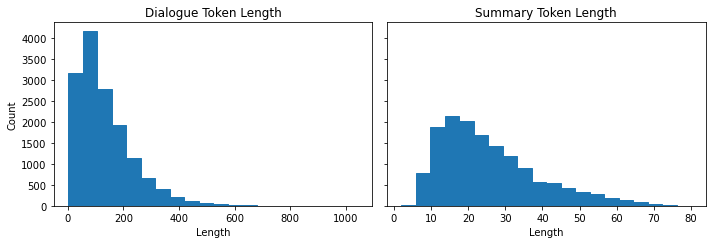

In [42]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [43]:
#hide_output
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,
                                truncation=True)
    
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=128,
                                     truncation=True)
    
    return {"input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "labels": target_encodings["input_ids"]}

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, 
                                       batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6/cache-8b5dd5876d3e7b30.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6/cache-88448730505a1502.arrow


In [44]:
#hide_input

#id teacher-forcing
#alt Decoder input and label alignemt for text generation.
#caption Decoder input and label alignemt for text generation.
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

,decoder_input,label
step,,
1,[PAD],Transformers
2,"[PAD, Transformers]",are
3,"[PAD, Transformers, are]",awesome
4,"[PAD, Transformers, are, awesome]",for
5,"[PAD, Transformers, are, awesome, for]",text
6,"[PAD, Transformers, are, awesome, for, text]",summarization


In [45]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [46]:
from transformers import TrainingArguments, Trainer

# training_args = TrainingArguments(
#     output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
#     per_device_train_batch_size=1, per_device_eval_batch_size=1,
#     weight_decay=0.01, logging_steps=10, push_to_hub=True,
#     evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
#     gradient_accumulation_steps=16)
training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=100,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10,
    evaluation_strategy='steps', eval_steps=50, save_steps=1e2,
    gradient_accumulation_steps=16)

In [48]:
# hide_output
trainer = Trainer(model=model, args=training_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"], 
                  eval_dataset=dataset_samsum_pt["validation"])

In [49]:
# !pip install GPUtil

# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache() 

In [50]:
# hide_output
trainer.train()    #Need to be uncommented
score = evaluate_summaries_pegasus(
    dataset_samsum["test"], rouge_metric, trainer.model, tokenizer,
    batch_size=1, column_text="dialogue", column_summary="summary")

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

The following columns in the training set  don't have a corresponding argument in `PegasusForConditionalGeneration.forward` and have been ignored: dialogue, summary, id.
***** Running training *****
  Num examples = 14732
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 16
  Total optimization steps = 230
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss
50,1.522100,1.403688
100,1.492000,1.391392
150,1.463100,1.377152
200,1.475700,1.371423


The following columns in the evaluation set  don't have a corresponding argument in `PegasusForConditionalGeneration.forward` and have been ignored: dialogue, summary, id.
***** Running Evaluation *****
  Num examples = 818
  Batch size = 4
The following columns in the evaluation set  don't have a corresponding argument in `PegasusForConditionalGeneration.forward` and have been ignored: dialogue, summary, id.
***** Running Evaluation *****
  Num examples = 818
  Batch size = 4
Saving model checkpoint to pegasus-samsum/checkpoint-100
Configuration saved in pegasus-samsum/checkpoint-100/config.json
Model weights saved in pegasus-samsum/checkpoint-100/pytorch_model.bin
tokenizer config file saved in pegasus-samsum/checkpoint-100/tokenizer_config.json
Special tokens file saved in pegasus-samsum/checkpoint-100/special_tokens_map.json
/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, b

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.445408,0.21889,0.377332,0.377692


In [51]:
# hide_input
pd.DataFrame(rouge_dict, index=[f"pegasus"])

,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.445408,0.21889,0.377332,0.377692


In [ ]:
# hide_output
#trainer.push_to_hub("Training complete!")

### Generating Dialogue Summaries

In [52]:
# hide
import transformers
transformers.logging.set_verbosity_error()

In [53]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 256}
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]
pipe = pipeline("summarization", model="transformersbook/pegasus-samsum")

print("Dialogue:")
print(sample_text)
print("\nReference Summary:")
print(reference)
print("\nModel Summary:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

Downloading:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Reference Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.

Model Summary:
Amanda can't find Betty's number. Larry called Betty last time they were at the park together. Hannah wants Amanda to text Larry instead of calling Betty.


In [54]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis and Leandro are going to write a book about transformers. Thom helped build a library by Hugging Face. They are going to do it together.


In [55]:
custom_dialogue = """\
Santosh: Hey Akshay, How are you?
Akshay: Hi Sohan, I am doing great!
Santosh: Are you going to office daily?.
Akshay: No, It is only Tuesday and Thursday.
Santosh: Cool, Let's meet next week?
Akshayt: Great idea!
Santosh: See you later!
Akshay: sure thanks! Have a great day ahead !
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Akshay is going to meet with Santosh next week. He is going to work on Tuesday and Thursday. It is only Tuesday and Thursday. Santosh and Akshay will meet next week.


In [56]:
custom_dialogue = """\
Sam: Oh? Bob!

Bob: Hey Sam! Good to see you!

Sam: How’s it going?

Bob: Yeah, good. Working a lot. And you?

Sam: I went back to school.

Bob: Good for you!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Sam went back to school. Bob is working a lot, and Sam is doing well. Bob and Sam are going to see each other in a few days.


In [57]:
custom_dialogue = """\
Jim: Mike?

Mike: Jim?

Jim: What have you been up to?

Mike: Working a lot.

Jim: That sounds hard.

Mike: How’s the family?

Jim: Everyone is good. Thanks!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Mike has been working a lot. He and his family are doing well. Jim thanks them for their kind words and wishes them luck for the rest of the week.


In [58]:
custom_dialogue = """\
Nathan: Hey, Alicia?

Alicia: Oh hey, I didn’t see you there. Did you already get a table?

Nathan: Yeah, right over here.

Alicia: I’m glad we had time to meet up.

Nathan: Me too. So, what’s going on?

Alicia: Oh, not much. You?

Nathan: Not much. Hey, how did your interview go? Wasn’t that today?

Alicia: Oh, yeah. I think it went well. I don’t know if I got the job yet, but they said they would call in a few days.

Nathan: Well, I’m sure you did great. Good luck.

Alicia: Thanks. I’m just happy that it’s over. I was really nervous about it.

Nathan: I can understand that. I get nervous before interviews, too.

Alicia: Well, thanks for being supportive. I appreciate it.

Nathan: Sure, no problem.
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Alicia's interview went well. She doesn't know if she got the job yet, but they will call in a few days. Nathan is supportive.


### Test On Chat Transcripts

In [59]:
custom_dialogue = """TP Training :	email-Tpjpr9@adobe.com
TP Training :	CUSTOM_SYSTEM_MESSAGE_You are now connected to Aprajita , who is reviewing your account. If you need to share sensitive information, such as credit card number, please wait for your agent to give you steps to share it securely.
Aprajita :	Hello, I'd be happy to help you today, let me first pull up your account information and access your details.
TP Training :	Hi Aprajita 
TP Training :	I want to know which subscription is active on my account
Aprajita :	Sure Tp Train, may i know u want to know Subscription details for your own account or tpjpr9@adobe.com?
TP Training :	for tpjpr9@adobe.com
Aprajita :	thankyou for confirming TP Training, as i can check on muy system there are 3 active plans on your account\n\n1-photoshop\n2- Illustrator\n3- Premiere Pro plan\nwhich plan you want to change
TP Training :	I dont want to change anything
TP Training :	please tell me my billing dates for all active subscriptions
Aprajita :	i apologize for that tp train\ni will help you with the billing dates of all 3 active subscriptions\nIllustrator-02-09-20222\nphotoshop- 02.09.2022\npremiere pro- 02.09.2022
TP Training :	okay
TP Training :	can you help me updating my card
Aprajita :	sure TP Training, i will help you in updating your card, are you in front oif your system?
TP Training :	yes I am
Aprajita :	ok, these are some steps by which you can update your card.\n1- Sign in at https://account.adobe.com/plans.\n2- Select Edit billing and payment.\n3- Edit billing and payment details\n4- Select either Add new or Edit.\n5- Edit billing and payment details\n6- Enter your card details, and then select Save.\nplease let me know if you face any issue with these steps.
TP Training :	okay...let me check
TP Training :	yes.. I was able to update the card
TP Training :	But it is not letting me use the subscriptions
TP Training :	it says something about activation limit reached
Aprajita :	ok TP Training i request you to please sign out from the last device then sign in on the other device then you will not facing any issue with that
TP Training :	ok
TP Training :	let me see
TP Training :	it is a little confusing
Aprajita :	these steps will help you in future aswell.\n1- You must be connected to the Internet for these steps to work.\n\n2- Connect to the Internet and launch the app on one of your other computers.\n\n3- Choose Help > Sign Out.\n\n4- Try activating the app on the new computer again.\n\n5- On the old computer, connect to the Internet, and then launch the app.\n\n6- Choose Help > Deactivate.\n\n7- Choose Deactivate\n8- On the new computer, connect to the Internet, and then launch the app.\n\n9- Choose Help > Activate. For more information on Activation, see Activate and deactivate products.
TP Training :	okay
TP Training :	perfect
TP Training :	it works
TP Training :	thanks
Aprajita :	Happy to help. You may receive an email with a survey link. Please take a moment to rate your experience and help us improve. Thanks!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

TP Training wants to know which subscription is active on his account. Aprajita will help him to update his card. TP Training was able to update the card but it is not letting him use the subscriptions.


### Data Source S3

In [60]:
import json
import pandas as pd
import boto3

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript1.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_1 = df['chat'].to_string(index=False)
print(chat_summary_1)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    TP Training : nan
                                                                                                                                  

In [61]:
print(pipe(chat_summary_1, **gen_kwargs)[0]["summary_text"])

TP Training wants to connect with an agent to help a customer with a billing or payment issue. Aprajita has forgotten her password. She will help TP Training to reset it.


In [62]:
import json
import pandas as pd
import boto3

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript5.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_5 = df['chat'].to_string(index=False)
print(chat_summary_5)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    TP Training : nan
                                                                                                                                  

In [63]:
print(pipe(chat_summary_5, **gen_kwargs)[0]["summary_text"])

Aprajita will help TP Training with a billing or payment issue. Aprajita will send the invoices to TP Training's work email address tpjpr9@adobetitle.com.


In [64]:
import json
import pandas as pd
import boto3

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)

region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript3.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_3 = df['chat'].to_string(index=False)
print(chat_summary_3)

In [66]:
chat_summary_3="""
first last : Plan change request
first last : CUSTOM_SYSTEM_MESSAGE_You are now connected to Samiksha, who is reviewing your account. If you need to share sensitive information, such as credit card number, please wait for your agent to give you steps to share it securely.
Samiksha : Hello, I'd be happy to help you today, let me first pull up your account information and access your details.
first last : ok
Samiksha : As I can see, you need assistance with password reset and plan change.\nTherefore.let's proceed with password reset link first and then we will help you in plan change as well.\nKindly visit your email account and click on the password reset link and reset the password.\nLet me know once you are done or if you face any issue.
first last : I have rested my password. I just want to change my pan. Please let me know how can we proceed?
Samiksha : Sure.\nLet us assist you for the same.\nKindly let me know what plan do you want to change to?
first last : Please let me know what do I have under my account?
Samiksha : You have a photoshop subscription on Annual Commitment / Monthly Billing basis commitment under your account.
first last : Pleas switch me to a photography plan and let me know what will it cost?
first last : Please*
Samiksha : Photography plan is available under 2 billings, mentioned below:\nAnnual, paid monthly\nUS$9.99/mo \nAnnual, prepaid\nUS$119.88/yr \n\nKindly let me know, which billing pattern you want to follow?\n
first last : Okay. I want the one that is for 9.99USD.
Samiksha : \nSure, Let me switch your photoshop plan to photography plan at 9.99USD/Month for annual commitment.\nKindly allow me 2 minutes.\n
first last : ok
Samiksha : First, s per the calculation, a refund amount of 3.86 USD (exclusive of tax) / 3.86 USD (inclusive of tax) will be credited to the payment medium registered.\nAlso, the payable amount for the subscription will be 9.99USD Inclusive of tax/monthly for an year commitment.\nKindly verify last 4 digits of your credit card attached to your adobe account.\n\n\n
first last : Thank you for the refund. last 4 digits are 1111
Samiksha : Kindly reply with "I Agree' to T&Cs:\n\nSubscription Terms:\nYour subscription begins as soon as your initial payment is processed. Your subscription will automatically renew annually without notice until you cancel. You authorize us to store your payment method(s) and to automatically charge your payment method(s) every month until you cancel. We will automatically charge you the then-current rate for your plan, plus applicable taxes (such as VAT or GST if the rate does not include it), every month of your annual contract until you cancel.\n\nWe may change your plan’s rate each annual renewal term, and we will notify you of any rate change with the option to cancel. If the applicable VAT or GST rate (or other included tax or duty) changes during your one-year term, we will accordingly adjust the tax-inclusive price for your plan mid-term on your next billing date.\n\nIf your primary payment method fails, you authorize us to charge any other payment method in your account. If you have not provided us a backup paymen
Samiksha : t method(s) and you fail to provide payment, or if all payment methods in your account fail, we may suspend your subscription. You can edit your payment information anytime in your Adobe Account page.\n\nCancellation Terms:\nYou can cancel your subscription anytime via your Adobe Account page or by contacting Customer Support*. If you cancel within 14 days of your initial order, you’ll be fully refunded. Should you cancel after 14 days, you’ll be charged a lump sum amount of 50% of your remaining contract obligation and your service will continue until the end of that month’s billing period.
first last : I agree
Samiksha : First, Kindly find the new order details below:\nNew Order : HB01586700125CUS\nNext billing date: 28th July 2022\nNext payable amount: 9.99USD\n\n\nAlso, you will get your refund in next 5 to 7 business days.
first last : Thank you for your quick assistance. I appriciate it.
Samiksha : Happy to help. You may receive an email with a survey link. Please take a moment to rate your experience and help us improve. Thanks!
Samiksha : nan
first last : CUSTOM_SYSTEM_MESSAGE_Samiksha has left the conversation.
"""

In [67]:
print(pipe(chat_summary_3, **gen_kwargs)[0]["summary_text"])

Samiksha will help you change your photoshop plan to photography plan at 9.99USD/Month for annual commitment. You can cancel your subscription anytime via your Adobe Account page or by contacting Customer Support*.


In [ ]:
region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript4.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_4 = df['chat'].to_string(index=False)
print(chat_summary_4)

In [ ]:
print(pipe(chat_summary_4, **gen_kwargs)[0]["summary_text"])

In [68]:
region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript5.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_5 = df['chat'].to_string(index=False)
print(chat_summary_5)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    TP Training : nan
                                                                                                                                  

In [69]:
print(pipe(chat_summary_5, **gen_kwargs)[0]["summary_text"])

Aprajita will help TP Training with a billing or payment issue. Aprajita will send the invoices to TP Training's work email address tpjpr9@adobetitle.com.


In [75]:
region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript6.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
df.head()
#chat_summary_6 = df['chat'].to_string(index=False)
#print(chat_summary_6)

,ContentType,Id,DisplayName,Type,ParticipantRole,AbsoluteTime,ParticipantId,Content,chat
0,application/vnd.amazonaws.connect.event.participant.joined,635e0baa-df21-447c-9fd5-2a86cf37e8c4,first last,EVENT,CUSTOMER,2022-07-07T21:47:18.126Z,588b152c-45be-48db-b11d-f8fed09850ff,NaN,first last : nan
1,text/plain,1b911088-e064-4f0a-a657-ebefaa776a3e,first last,MESSAGE,CUSTOMER,2022-07-07T21:47:22.028Z,588b152c-45be-48db-b11d-f8fed09850ff,[customer connecting with agent - disregard],first last : [customer connecting with agent - disregard]
2,text/plain,fbfdea59-dfb6-4397-9f62-48e2ee3375e8,BOT,MESSAGE,SYSTEM,2022-07-07T21:47:22.901Z,0d9e69cf-2004-48cd-93be-37e57119a3db,Hi. I am the Adobe Virtual Assistant. How can I help?,BOT : Hi. I am the Adobe Virtual Assistant. How can I help?
3,text/plain,5ad55076-b476-4953-a10c-66c7048d0c75,first last,MESSAGE,CUSTOMER,2022-07-07T21:47:23.218Z,588b152c-45be-48db-b11d-f8fed09850ff,Password reset,first last : Password reset
4,text/plain,a0a93759-f838-4204-9d85-81f58be9b6a8,BOT,MESSAGE,SYSTEM,2022-07-07T21:47:24.745Z,0d9e69cf-2004-48cd-93be-37e57119a3db,"{""genericAttachments"":[{""title"":""You need help changing the password for your Adobe account. Is that right?"",""buttons"":[{""text"":""Yes"",""value"":""Yes""},{""text"":""No"",""value"":""No""}]}]}","BOT : {""genericAttachments"":[{""title"":""You need help changing the password for your Adobe account. Is that right?"",""buttons"":[{""text"":""Yes"",""value"":""Yes""},{""text"":""No"",""value"":""No""}]}]}"


In [76]:
print(pipe(chat_summary_6, **gen_kwargs)[0]["summary_text"])

NameError: name 'chat_summary_6' is not defined

In [ ]:
chat_summary_6="""
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    first last : nan\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             first last : [customer connecting with agent - disregard]\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           BOT : Hi. I am the Adobe Virtual Assistant. How can I help?\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           first last : Password reset\n                                                                                                                                                                                                                                                                                                                                                                             BOT : {"genericAttachments":[{"title":"You need help changing the password for your Adobe account. Is that right?","buttons":[{"text":"Yes","value":"Yes"},{"text":"No","value":"No"}]}]}\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      first last : Yes\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  BOT : Go to your privacy and security settings at adobe.com/go/stage-change-password\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   BOT : Under Password, click Change.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     BOT : (Minimize the chat to see all the details.)\n                                                                                                                                                                                                                                                                                                                      BOT : {"genericAttachments":[{"title":"Did that help?","buttons":[{"text":"Yes","value":"Yes","click":{"actions":[{"text":"Yes","type":"publishText"}]}},{"text":"No","value":"No","click":{"actions":[{"text":"No","type":"publishText"}]}}]}]}\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       first last : No\n                                                                                                                                                                                                                                   BOT : {"genericAttachments":[{"title":"Would you like to chat with an agent?","buttons":[{"text":"Yes, chat with an agent","value":"Yes, chat with an agent","click":{"actions":[{"text":"Yes, chat with an agent","type":"publishText"}]}},{"text":"No","value":"No","click":{"actions":[{"text":"No","type":"publishText"}]}}]}]}\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  first last : Yes, chat with an agent\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          BOT : Ok. I\'ll connect you to an agent who can pick up where we\'ve left off.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         SYSTEM_MESSAGE : Connecting you with a senior specialist as soon as possible.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                         first last : CUSTOM_SYSTEM_MESSAGE_Your estimated wait time is currently less than one minute\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Samiksha : nan\n                                                                                                                                                                                                                                                                                                                       first last : CUSTOM_SYSTEM_MESSAGE_You are now connected to Samiksha, who is reviewing your account. If you need to share sensitive information, such as credit card number, please wait for your agent to give you steps to share it securely.\n                                                                                                                                                                                                                                                                                                                                                                                                                                              Samiksha : Hello, I\'d be happy to help you today, let me first pull up your account information and access your details.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                first last : I need to avail my Redemption code. How shall i do that ?\nSamiksha : Sure, we will be happy to assist you with the activation of Redemption code.\\n\\nKindly, follow the below mentioned steps to activate the redemption code on your account:\\n1. Go to creative.adobe.com/redeem\\n2. Sign In or Sign Up\\n3. Enter Your Information\\n4. Enter Your Redemption Code\\n5. In the Keep Your Membership Current section enter billing info or click "remind me" to avoid enter billing info.\\n6. Start using Creative Cloud.\\n7. You should now see a screen that says "Thank you. Your redemption code has been applied."\\n\\n\\n\\n\\n\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               first last : Thank you.\n                                                                                                                                                                                                                                                                                                                                               Samiksha : You can also visit the below mentioned link for future references:\\nhttps://community.adobe.com/t5/account-payment-plan-discussions/how-to-activate-adobe-creative-cloud-using-a-redemption-code/m-p/6391479\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   first last : Could you also let me know the price for Illustrator ?\n                                                                                                            Samiksha : Sure, Illustrator is available under 3 different billing patterns, mentioned below:\\n\\n Monthly\\nUS$31.49/mo \\nCancel anytime, no fee.\\n\\nAnnual, paid monthly\\nUS$20.99/mo \\nFee applies if you cancel after 14 days.\\n\\nAnnual, prepaid\\nUS$239.88/yr \\nNo refund if you cancel after 14 days.\\n\\nAll The above mentioned prices are exclusive of taxes.\\n\\nLet me know if you need assistance with the purchase of Illustrator subscription.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          first last : Thank you. That\'s all i needed.\n                                                                                                                                                                                                                                                                                                                                                                                                                      Samiksha : Happy to help. You may receive an email with a survey link. Please take a moment to rate your experience and help us improve. Thanks!\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Samiksha : nan\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                first last : CUSTOM_SYSTEM_MESSAGE_Samiksha has left the conversation.'
"""

In [ ]:
print(chat_summary_6)

In [ ]:
print(pipe(chat_summary_6, **gen_kwargs)[0]["summary_text"])

In [77]:
region='us-east-1'
bucket = 'agent-performance'
val_key = 'chat_transcript7.json'

session = boto3.Session(region_name=region)
s3 = session.resource('s3')
val_path = s3.Object(bucket,val_key).get()['Body'].read().decode('utf-8')
json_data = json.loads(val_path)

df = pd.json_normalize(json_data['Transcript'])
base_string = "{name} : {message}"
df['chat'] = [base_string.format(name=x,message=y) for x,y in zip(df['DisplayName'], df['Content'])]
chat_summary_7 = df['chat'].to_string(index=False)
print(chat_summary_7)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    TP Training : nan
                                                                                                                                  

In [78]:
print(pipe(chat_summary_7, **gen_kwargs)[0]["summary_text"])

Aprajita will help you to update your card details. If you need to share sensitive information, such as credit card number, please wait for your agent to give you steps to share it securely.
